# Computational Social Science Project #3
Group number: 1

Group members: Benjamin Fields, Ernesto Gutierrez, and Nehal Eldeeb

Semester: Fall 2021

## 1. Introduction

In [31]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelBinarizer

# Make sure to import other libraries that will be necessary for training models!
#This is importing the required packages and functions for running all three models
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
%matplotlib inline
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore')
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

## 2. Data Pre-Processing & Cleaning

In [2]:
# Inspections Data 2011 - 2013
chicago_inspections_2011_to_2013 = pd.read_csv("data/Chicago Inspections 2011-2013.csv", 
                                               low_memory=False)

# Inspections Data 2014
chicago_inspections_2014 = pd.read_csv("data/Chicago Inspections 2014.csv", 
                                            low_memory=False)

In [3]:
# Look at the inspections data
chicago_inspections_2011_to_2013.head()

Inspection_ID Inspection_Date                      DBA_Name  \
0         269961      2013-01-31                    SEVEN STAR   
1         507211      2011-10-18                  PANERA BREAD   
2         507212      2011-10-18      LITTLE QUIAPO RESTAURANT   
3         507216      2011-10-19  SERGIO'S TAQUERIA PIZZA INC.   
4         507219      2011-10-20         TARGET STORE # T-2079   

                   AKA_Name  License  Facility_Type             Risk  \
0                SEVEN STAR    30790  Grocery Store     Risk 3 (Low)   
1              PANERA BREAD  1475890     Restaurant    Risk 1 (High)   
2  LITTLE QUIAPO RESTAURANT  1740130     Restaurant    Risk 1 (High)   
3   SERGIO'S TAQUERIA PIZZA  1447363     Restaurant    Risk 1 (High)   
4                    TARGET  1679459     Restaurant  Risk 2 (Medium)   

                 Address     City State      Zip Inspection_Type Results  \
0       3352 N BROADWAY   CHICAGO    IL  60657.0         Canvass    Pass   
1    6059 N LINCOLN AVE   CHICAGO    IL  60659.0         Canvass    Pass   
2   6259 N MCCORMICK RD   CHICAGO    IL  60659.0         Canvass    Fail   
3  3253 W BRYN MAWR AVE   CHICAGO    IL  60659.0         Canvass    Pass   
4   2112 W PETERSON AVE   CHICAGO    IL  60659.0         Canvass    Fail   

    Latitude  Longitude                                  Location  \
0  41.943359 -87.644999  (41.943359344775146, -87.64499875300952)   
1  41.991919 -87.709631   (41.99191947239194, -87.70963133440333)   
2  41.995632 -87.712707   (41.99563177556418, -87.71270678169132)   
3  41.982933 -87.710982  (41.982933189164974, -87.71098225381141)   
4  41.990729 -87.682979   (41.99072921796059, -87.68297945359863)   

  Facility_Type_Clean  criticalCount  seriousCount  minorCount  pass_flag  \
0               Other              0             0           2          1   
1          Restaurant              0             0           3          1   
2          Restaurant              0             2           6          0   
3          Restaurant              0             0           6          1   
4          Restaurant              0             2           6          0   

   fail_flag  pastFail  pastCritical  pastSerious  pastMinor  timeSinceLast  \
0          0         0             0            0          0            2.0   
1          0         0             0            0          0            2.0   
2          1         0             0            0          0            2.0   
3          0         0             0            0          0            2.0   
4          1         0             0            0          0            2.0   

   firstRecord                ID  LICENSE_ID  ACCOUNT_NUMBER  \
0            1    30790-20110416   2081412.0         63759.0   
1            1  1475890-20110416   2081695.0        207283.0   
2            1  1740130-20110216   2070145.0          3107.0   
3            1  1447363-20110216   2071895.0        270993.0   
4            1  1679459-20100216   2009972.0         15538.0   

                     LEGAL_NAME        DOING_BUSINESS_AS_NAME  \
0            VIRGINIA DELA ROSA                    SEVEN STAR   
1                   PANERA, LLC                  PANERA BREAD   
2                ENELITA GARCIA      LITTLE QUIAPO RESTAURANT   
3  SERGIO'S TAZUERIA PIZZA INC.  SERGIO'S TAQUERIA PIZZA INC.   
4            TARGET CORPORATION         TARGET STORE # T-2079   

                 ADDRESS     CITY STATE  ZIP_CODE  WARD  PRECINCT  \
0    3352 N BROADWAY   1  CHICAGO    IL   60657.0  44.0      33.0   
1  6059 N LINCOLN AVE  C  CHICAGO    IL   60659.0  50.0      23.0   
2    6259 N MCCORMICK RD  CHICAGO    IL   60659.0  50.0      25.0   
3   3253 W BRYN MAWR AVE  CHICAGO    IL   60659.0  39.0      48.0   
4    2112 W PETERSON AVE  CHICAGO    IL   60659.0  40.0      18.0   

  WARD_PRECINCT  POLICE_DISTRICT  LICENSE_CODE        LICENSE_DESCRIPTION  \
0         44-33             19.0        1006.0  Retail Food Establishment   
1         50-23   

In [4]:
# List column names
chicago_inspections_2011_to_2013.columns

Index(['Inspection_ID', 'Inspection_Date', 'DBA_Name', 'AKA_Name', 'License',
       'Facility_Type', 'Risk', 'Address', 'City', 'State', 'Zip',
       'Inspection_Type', 'Results', 'Latitude', 'Longitude', 'Location',
       'Facility_Type_Clean', 'criticalCount', 'seriousCount', 'minorCount',
       'pass_flag', 'fail_flag', 'pastFail', 'pastCritical', 'pastSerious',
       'pastMinor', 'timeSinceLast', 'firstRecord', 'ID', 'LICENSE_ID',
       'ACCOUNT_NUMBER', 'LEGAL_NAME', 'DOING_BUSINESS_AS_NAME', 'ADDRESS',
       'CITY', 'STATE', 'ZIP_CODE', 'WARD', 'PRECINCT', 'WARD_PRECINCT',
       'POLICE_DISTRICT', 'LICENSE_CODE', 'LICENSE_DESCRIPTION',
       'BUSINESS_ACTIVITY_ID', 'BUSINESS_ACTIVITY', 'LICENSE_NUMBER',
       'APPLICATION_TYPE', 'LICENSE_TERM_START_DATE',
       'LICENSE_TERM_EXPIRATION_DATE', 'LICENSE_STATUS', 'LATITUDE',
       'LONGITUDE', 'minDate', 'maxDate', 'ageAtInspection',
       'consumption_on_premises_incidental_activity', 'tobacco',
       'package_goods',

In [5]:
# Drop column names related to geography, identification, and pass/fail flags that perfectly predict the outcome
chicago_inspections_2011_to_2013.drop(columns = ['AKA_Name', 
                                                'License',
                                                'Address',
                                                'City',
                                                'State',
                                                'Zip',
                                                'Latitude',
                                                'Longitude',
                                                'Location',
                                                'ID',
                                                'LICENSE_ID',
                                                'LICENSE_TERM_START_DATE',
                                                'LICENSE_TERM_EXPIRATION_DATE',
                                                'LICENSE_STATUS',
                                                'ACCOUNT_NUMBER',
                                                'LEGAL_NAME',
                                                'DOING_BUSINESS_AS_NAME',
                                                'ADDRESS',
                                                'CITY',
                                                'STATE',
                                                'ZIP_CODE',
                                                'WARD',
                                                'PRECINCT',
                                                'LICENSE_CODE',
                                                'BUSINESS_ACTIVITY_ID',
                                                'BUSINESS_ACTIVITY',
                                                'LICENSE_NUMBER',
                                                'LATITUDE',
                                                'LONGITUDE',
                                                'pass_flag',
                                                'fail_flag'],
                                     inplace = True)

chicago_inspections_2011_to_2013.set_index(['Inspection_ID', 'DBA_Name'], inplace = True)

In [6]:
# Convert the Inspection Date to a datetime format
chicago_inspections_2011_to_2013['Inspection_Date'] = pd.to_datetime(chicago_inspections_2011_to_2013['Inspection_Date'], infer_datetime_format=True)  

In [7]:
chicago_inspections_2011_to_2013.shape

(17677, 42)

### Visualization

What do inspections look like over time?

<AxesSubplot:title={'center':'Inspections by Month and Year'}, xlabel='Inspection_MonthYear'>

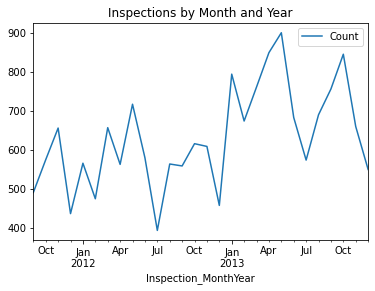

In [8]:
# Visualize Inspections Over Time
chicago_inspections_2011_to_2013['Inspection_MonthYear'] = chicago_inspections_2011_to_2013['Inspection_Date'].dt.to_period('M')
counts_by_day = chicago_inspections_2011_to_2013.groupby('Inspection_MonthYear').count().rename(columns = {'Facility_Type': 'Count'})['Count'].reset_index()
counts_by_day.set_index(["Inspection_MonthYear"], inplace = True)
counts_by_day.plot(title = "Inspections by Month and Year")

What do the results look like? 

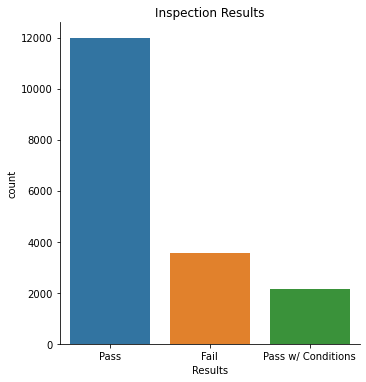

In [9]:
# Inspection Results
sns.catplot(data = chicago_inspections_2011_to_2013,
           x = "Results",
           kind = "count")

plt.title("Inspection Results")
plt.show()

What if we separate by facility type?

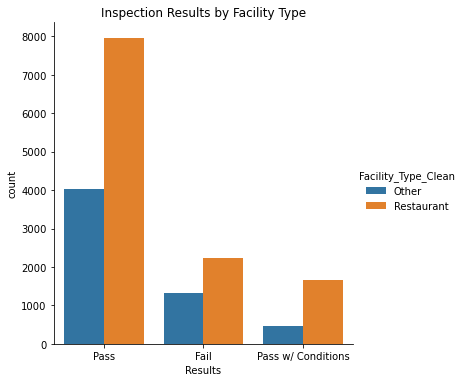

In [10]:
# Inspection Results by Facility Type (Restaurant or Not)
sns.catplot(data = chicago_inspections_2011_to_2013,
           x = "Results",
           kind = "count",
           hue = 'Facility_Type_Clean')

plt.title("Inspection Results by Facility Type")
plt.show()

### Preprocess Data

In [11]:
# Drop datetime info
chicago_inspections_2011_to_2013 = chicago_inspections_2011_to_2013.dropna().drop(['Inspection_Date',
                                      'minDate',
                                      'maxDate',
                                      'Inspection_MonthYear'],
                                      axis = 1)

In [12]:
chicago_inspections_2011_to_2013

Facility_Type  \
Inspection_ID DBA_Name                                                  
269961        SEVEN STAR                                Grocery Store   
507211        PANERA BREAD                                 Restaurant   
507212        LITTLE QUIAPO RESTAURANT                     Restaurant   
507216        SERGIO'S TAQUERIA PIZZA INC.                 Restaurant   
507219        TARGET STORE # T-2079                        Restaurant   
...                                                               ...   
1393258       CIAO BELLA CAFE                              Restaurant   
1395218       Christian Fields Style  Bar                  Restaurant   
1395224       W CHICAGO - LAKESHORE                        Restaurant   
1441493       ADVOCATE ILLINOIS MASONIC MEDICAL CENTER     Restaurant   
1493801       SODEXHO                                      Restaurant   

                                                                   Risk  \
Inspection_ID DBA_Name                                                    
269961        SEVEN STAR                                   Risk 3 (Low)   
507211        PANERA BREAD                                Risk 1 (High)   
507212        LITTLE QUIAPO RESTAURANT                    Risk 1 (High)   
507216        SERGIO'S TAQUERIA PIZZA INC.                Risk 1 (High)   
507219        TARGET STORE # T-2079                     Risk 2 (Medium)   
...                                                                 ...   
1393258       CIAO BELLA CAFE                             Risk 1 (High)   
1395218       Christian Fields Style  Bar               Risk 2 (Medium)   
1395224       W CHICAGO - LAKESHORE                       Risk 1 (High)   
1441493       ADVOCATE ILLINOIS MASONIC MEDICAL CENTER    Risk 1 (High)   
1493801       SODEXHO                                     Risk 1 (High)   

                                                       Inspection_Type  \
Inspection_ID DBA_Name                                                   
269961        SEVEN STAR                                       Canvass   
507211        PANERA BREAD                                     Canvass   
507212        LITTLE QUIAPO RESTAURANT                         Canvass   
507216        SERGIO'S TAQUERIA PIZZA INC.                     Canvass   
507219        TARGET STORE # T-2079                            Canvass   
...                                                                ...   
1393258       CIAO BELLA CAFE                                  Canvass   
1395218       Christian Fields Style  Bar                      Canvass   
1395224       W CHICAGO - LAKESHORE                            Canvass   
1441493       ADVOCATE ILLINOIS MASONIC MEDICAL CENTER         Canvass   
1493801       SODEXHO                                          Canvass   

                                                                   Results  \
Inspection_ID DBA_Name                                                       
269961        SEVEN STAR                                              Pass   
507211        PANERA BREAD                                            Pass   
507212        LITTLE QUIAPO RESTAURANT                                Fail   
507216        SERGIO'S TAQUERIA PIZZA INC.                            Pass   
507219        TARGET STORE # T-2079                                   Fail   
...                                                                    ...   
1393258       CIAO BELLA CAFE                                         Pass   
1395218       Christian Fields Style  Bar                             Pass   
1395224       W CHICAGO - LAKESHORE                     Pass w/ Conditions   
1441493       ADVOCATE ILLINOIS MASONIC MEDICAL CENTER                Pass   
1493801       SODEXHO                                                 Pass   

                                                       Facility_Type_Clean  \
Inspection_ID DBA_Name                                                    

In [13]:
# Set target variable. 
y = chicago_inspections_2011_to_2013['Results']
## Comment out the following code if you don't want to binarize the target variable
y = y.replace({'Pass w/ Conditions': 'Pass'})
lb_style = LabelBinarizer()
y = lb_style.fit_transform(y)
# Recode 0s and 1s so 1s are "Fail"
y = np.where(y == 1, 0 ,1)

# All other features in X
X = chicago_inspections_2011_to_2013.drop(columns = ['Results'])
X = pd.get_dummies(X)

In [14]:
X.head()

criticalCount  seriousCount  \
Inspection_ID DBA_Name                                                    
269961        SEVEN STAR                                0             0   
507211        PANERA BREAD                              0             0   
507212        LITTLE QUIAPO RESTAURANT                  0             2   
507216        SERGIO'S TAQUERIA PIZZA INC.              0             0   
507219        TARGET STORE # T-2079                     0             2   

                                            minorCount  pastFail  \
Inspection_ID DBA_Name                                             
269961        SEVEN STAR                             2         0   
507211        PANERA BREAD                           3         0   
507212        LITTLE QUIAPO RESTAURANT               6         0   
507216        SERGIO'S TAQUERIA PIZZA INC.           6         0   
507219        TARGET STORE # T-2079                  6         0   

                                            pastCritical  pastSerious  \
Inspection_ID DBA_Name                                                  
269961        SEVEN STAR                               0            0   
507211        PANERA BREAD                             0            0   
507212        LITTLE QUIAPO RESTAURANT                 0            0   
507216        SERGIO'S TAQUERIA PIZZA INC.             0            0   
507219        TARGET STORE # T-2079                    0            0   

                                            pastMinor  timeSinceLast  \
Inspection_ID DBA_Name                                                 
269961        SEVEN STAR                            0            2.0   
507211        PANERA BREAD                          0            2.0   
507212        LITTLE QUIAPO RESTAURANT              0            2.0   
507216        SERGIO'S TAQUERIA PIZZA INC.          0            2.0   
507219        TARGET STORE # T-2079                 0            2.0   

                                            firstRecord  POLICE_DISTRICT  \
Inspection_ID DBA_Name                                                     
269961        SEVEN STAR                              1             19.0   
507211        PANERA BREAD                            1             24.0   
507212        LITTLE QUIAPO RESTAURANT                1             17.0   
507216        SERGIO'S TAQUERIA PIZZA INC.            1             17.0   
507219        TARGET STORE # T-2079                   1             24.0   

                                            ageAtInspection  \
Inspection_ID DBA_Name                                        
269961        SEVEN STAR                          10.964384   
507211        PANERA BREAD                         7.457534   
507212        LITTLE QUIAPO RESTAURANT             4.578082   
507216        SERGIO'S TAQUERIA PIZZA INC.         7.805479   
507219        TARGET STORE # T-2079                5.290411   

                                            consumption_on_premises_incidental_activity  \
Inspection_ID DBA_Name                                                                    
269961        SEVEN STAR                                                              0   
507211        PANERA BREAD                                                            0   
507212        LITTLE QUIAPO RESTAURANT                                                0   
507216        SERGIO'S TAQUERIA PIZZA INC.                                            0   
507219        TARGET STORE # T-2079                                                   0   

                                            tobacco  package_goods  \
Inspection_ID DBA_Name                                               
269961        SEVEN STAR                          1              0   
507211        PANERA BREAD                        0              0   
507212        LITTLE QUIAPO RESTAURANT            0              0   
507216        SERGIO'S TAQUERIA PIZZA INC.        0          

## 3. Fit Models

In [15]:
#Set the seed
np.random.seed(12345)

### 3.1 Data Splitting

In [16]:
#Create the training and validation sets
X_train, X_validate, y_train, y_validate = train_test_split(X, y, train_size = .80, test_size=0.20, stratify=y)

In [17]:
print("Shape of X train is", X_train.shape)
print("Shape of y_train is", y_train.shape)
print("Shape of X_validate is", X_validate.shape)
print("Shape of y_validate is", y_validate.shape)

Shape of X train is (12248, 2042)
Shape of y_train is (12248, 1)
Shape of X_validate is (3063, 2042)
Shape of y_validate is (3063, 1)


### 3.2 Model 1 - Logistic Regression

##### NE: LET'S NOT FORGET TO DO THIS - Describe the basic logic and assumptions underlying each model, it's pros/cons, and why it is a plausible choice for this problem

Be sure to do the following:

1. Import the appropriate library from sklearn
2. Set up a hyperparameter grid (check out our previous labs to see how to do this)
3. Find the best hyperparameters, and then fit your model (using train/validation splits or cross-validation)

In [18]:
#Logistic Regression Model
logit_reg = LogisticRegression()
logit_model = logit_reg.fit(X_train, y_train.ravel())
log_pred = logit_model.predict(X_validate)

In [19]:
#Hyperparameter Tuning
param_grid = {'penalty': ['l1', 'l2', 'elasticnet'],
              'C': np.arange(.1, 1, .1),
              'fit_intercept': ['True', 'False'],
              'solver': ['liblinear', 'saga']}

logit_grid = GridSearchCV(logit_reg, param_grid, cv=3)
logit_grid.fit(X_train, y_train)

best_index = np.argmax(logit_grid.cv_results_["mean_test_score"])
best_logit_pred = logit_grid.best_estimator_.predict(X_validate)

print("Optimal hyperparameters for Logit:", logit_grid.cv_results_["params"][best_index])
print('Validation Accuracy', accuracy_score(best_logit_pred, y_validate))

Optimal hyperparameters for Logit: {'C': 0.1, 'fit_intercept': 'True', 'penalty': 'l1', 'solver': 'saga'}
Validation Accuracy 0.9187071498530852


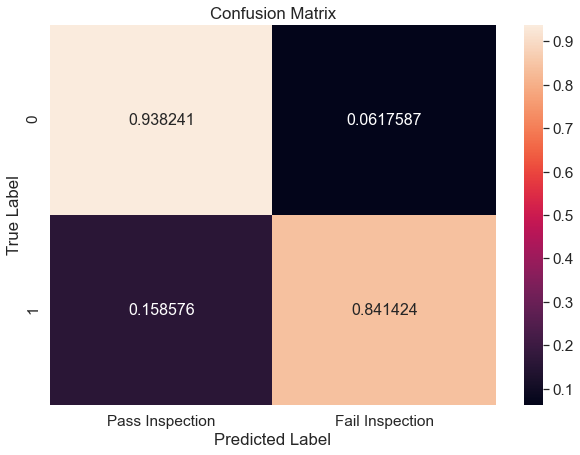

In [20]:
#Creating a Confusion Matrix
cf_matrix = confusion_matrix(y_validate, best_logit_pred, normalize = "true")
df_cm = pd.DataFrame(cf_matrix, range(2), range(2))
df_cm = df_cm.rename(index=str, columns={0: "Pass Inspection", 1: "Fail Inspection"})
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, 
           annot=True,
           annot_kws={"size": 16},
           fmt='g')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

### 3.2 Model 2 - Support Vector Machine

In [21]:
# #Support Vector Machine Model
# svm = SVC()

# #fit the model
# svm_model = svm.fit(X_train, y_train)

# y_pred = svm_model.predict(X_validate)

In [22]:
# # svm = SVC()

# # hyperparameter grid
# param_grid2 = {'C': [.5,1],
#               'gamma': [1,.1]}

# svm_grid = GridSearchCV(svm, param_grid2, cv=3)
# svm_grid.fit(X_train, y_train)

# best_index = np.argmax(svm_grid.cv_results_["mean_test_score"])
# best_svm_pred = svm_grid.best_estimator_.predict(X_validate)

# print("Optimal hyperparameters for SVM:", svm_grid.cv_results_["params"][best_index])
# print('Validation Accuracy', accuracy_score(best_svm_pred, y_validate))

In [23]:
# #confusion matrix stuff
# cf_matrix2 = confusion_matrix(y_validate, best_svm_pred, normalize = "true")
# df_cm2 = pd.DataFrame(cf_matrix, range(2), range(2))
# df_cm2 = df_cm.rename(index=str, columns={0: "Pass Inspection", 1: "Fail Inspection"})
# #Visualization
# plt.figure(figsize = (10,7))
# sns.set(font_scale=1.4)#for label size
# sns.heatmap(df_cm, 
#            annot=True,
#            annot_kws={"size": 16},
#            fmt='g')
# plt.title("Confusion Matrix")
# plt.xlabel("Predicted Label")
# plt.ylabel("True Label")
# plt.show()

### 3.2 Model 3 - Decision Tree

Score value for decision tree: 0.9294809010773751


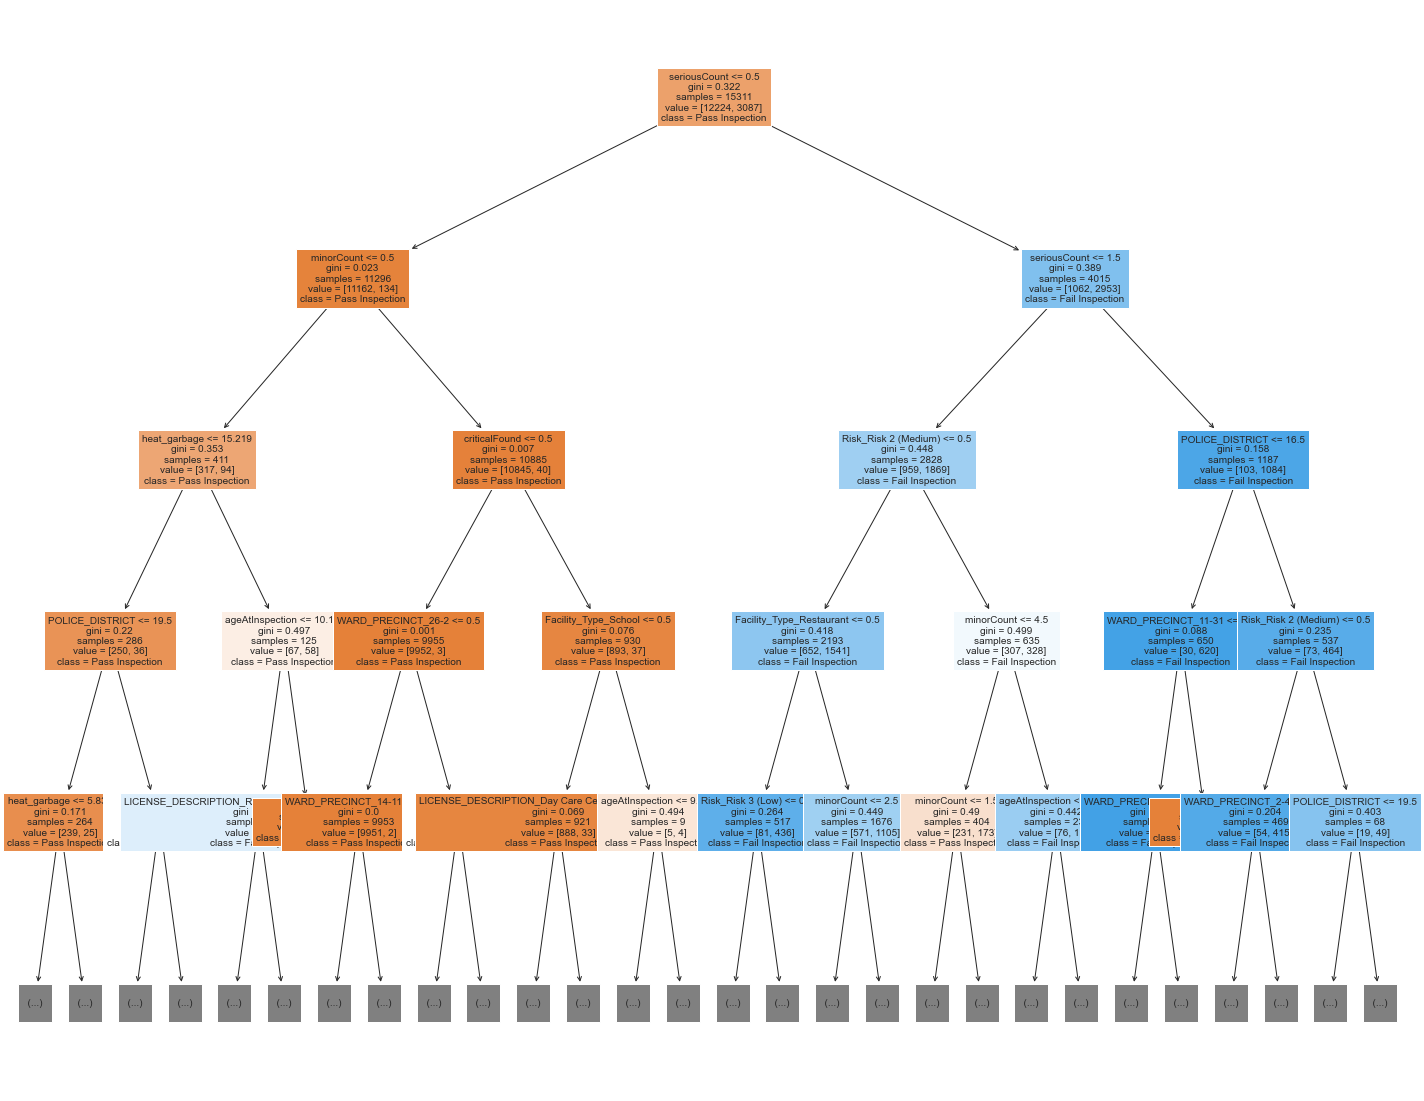

In [24]:
#Decision Tree Model
#Creating a decision tree classifier
dt_classifier = tree.DecisionTreeClassifier(criterion='gini',
                       splitter='best',
                       max_depth=5, 
                       min_samples_split=2,
                       min_samples_leaf=1,
                       min_weight_fraction_leaf=0.0,
                       max_features=None,
                       max_leaf_nodes=None,
                       min_impurity_decrease=1e-07,
                       random_state = 12345) #random seed

dt_classifier.fit(X, y)

dt_pred = dt_classifier.predict(X_validate)
score = accuracy_score(y_validate, dt_pred)
print("Score value for decision tree:",score)

#Visualization
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dt_classifier, 
                   feature_names=X.columns,  
                   class_names=["Pass Inspection", "Fail Inspection"],
                   filled=True,
                  fontsize = 10,
                  max_depth = 4)

In [25]:
#Hypertuning for Decision Tree
param_grid3 = {'min_samples_split': np.arange(2, 10), 
               'min_samples_leaf': np.arange(.05, .2), 
               'max_depth': np.arange(2, 5)}

dtc_grid = GridSearchCV(estimator = dt_classifier, param_grid = param_grid3, cv = 3, 
    scoring = accuracy_score, refit='precision', n_jobs=-1)
dtc_grid.fit(X_train, y_train)

best_index = np.argmax(dtc_grid.cv_results_["mean_test_score"])
best_dtc_pred = dtc_grid.best_estimator_.predict(X_validate)

print("Optimal hyperparameters for DTC", dtc_grid.cv_results_["params"][best_index])
print('Validation Accuracy', accuracy_score(best_dtc_pred, y_validate))

Optimal hyperparameters for DTC {'max_leaf_nodes': 2, 'min_samples_leaf': 0.05, 'min_samples_split': 2}
Validation Accuracy 0.920666013712047


### 3.3 Validation Metrics

**Hint**: Try writing a for loop to use [`cross_val_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) to check for accuracy, precision, recall and f1 across all of your models.

In [26]:
for clf, label in zip([logit_grid.best_estimator_, 
                       svm_grid.best_estimator_, 
                       dtc_grid.best_estimator_], ['Logistic Regression', 
                                            'SVM', 
                                            'Decision Tree']):
    scores = cross_val_score(clf, X_validate, y_validate.ravel(), scoring='accuracy', cv=5)
    print('Accuracy: %0.2f [%s]' % (scores.mean(), label))
    scores = cross_val_score(clf, X_validate, y_validate.ravel(), scoring='precision', cv=5)
    print('Precision: %0.2f [%s]' % (scores.mean(), label))
    scores = cross_val_score(clf, X_validate, y_validate.ravel(), scoring='recall', cv=5)
    print('Recall: %0.2f [%s]' % (scores.mean(), label))
    scores = cross_val_score(clf, X_validate, y_validate.ravel(), scoring='f1', cv=5)
    print('F1: %0.2f [%s]' % (scores.mean(), label))  

NameError: name 'svm_grid' is not defined

##NE: ASK KQ WHY SVM IS 0 
More concerned with those that would be at risk of failing. -PRIORITIZE RECALL

## 4. Policy Simulation

### 4.1 Interpretable Machine Learning

**Hint**: Use tools like feature importance plots and coefficient plots

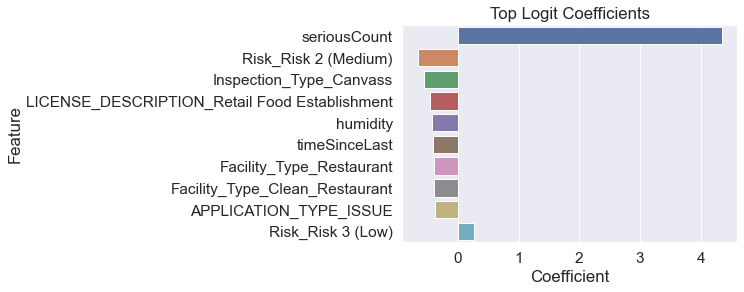

In [27]:
#Handling the Data for the Logistic Regression Model
logit_data = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(logit_model.coef_))], axis = 1)
logit_data.columns = ['Feature', 'Coefficient']
logit_data['abs_coef'] = abs(logit_data['Coefficient'])

#Visualizing the Logistic Regression Model
sns.barplot(x="Coefficient", y="Feature", data=logit_data.nlargest(10, 'abs_coef')).set_title("Top Logit Coefficients")
plt.show()

In [28]:
# SVM -- see confusion matrix in previous section

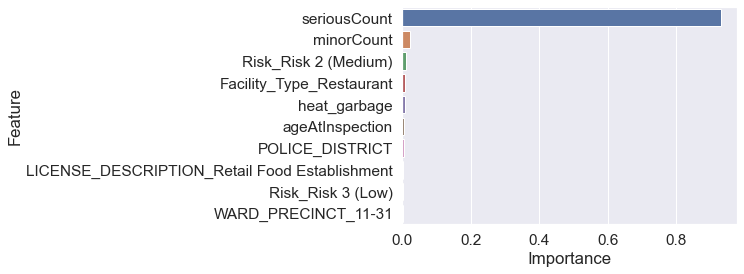

In [29]:
##decision tree classifier feature importance plot 
dt_data = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(dt_classifier.feature_importances_))],
                    axis = 1)
dt_data.columns = ["Feature", "Importance"]

sns.barplot(x = "Importance", y = "Feature", data = dt_data.nlargest(10, 'Importance'))
plt.show()

NE: Serious count contribute most to both predicting the logistic model and decision tree. 
Could also incorporate risk 2 but it's not very predictive - weak link

### 4.2 Prioritize Audits

**Hint**: Look up the [`.predict()`](https://www.kite.com/python/docs/sklearn.linear_model.SGDRegressor.predict), [`.predict_proba()`](https://www.kite.com/python/docs/sklearn.linear_model.LogisticRegression.predict_proba), and [`.sample()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html) methods. Then: 
1. Choose one of your models (or train a new simplified model or ensemble!) to predict outcomes and probabilities. 
2. Order your audits by their probability of detecting a "Fail" score
3. Plot your distribution of pass/fail among the first 1000 observations in the dataset
4. Simulate random audits on the full chicago_2011_to_2013.csv dataset by picking 1000 observations at random

In [32]:
# Random Forest
rf_classifier = RandomForestClassifier(criterion='gini',  # or 'entropy' for information gain
                       max_depth=None,  # how deep tree nodes can go ##REPLACE WITH HYPERTUNED 
                       min_samples_split=2,  # samples needed to split node
                       min_samples_leaf=0.05,  # samples needed for a leaf
                       min_weight_fraction_leaf=0.0,  # weight of samples needed for a node
                       max_features=None,  # number of features to look for when splitting
                       max_leaf_nodes=None,  # max nodes
                       min_impurity_decrease=1e-07, #early stopping
                       random_state = 10) #random seed


In [34]:
scores = cross_val_score(rf_classifier, X, y.ravel(), scoring='accuracy', cv=5)
print('Accuracy: %0.2f [Random Forest]' % (scores.mean()))

Accuracy: 0.92 [Random Forest]


In [35]:
#predict outcomes and probabilities using random forest
probas = rf_classifier.fit(X, y.ravel()).predict_proba(X)[:,1]

In [73]:
#created a copy of x and added predicted probabilities as a column
probs_df = X.copy()
probs_df["Label"] = y.tolist()
probs_df["probs"] = probas.tolist()

#sort probabilities in descending order 
probs_df.sort_values(by='probs', axis=0, ascending=False, inplace=True)

#Generate a list of 1000 riskiest establishments 
risky1000_df = probs_df.nlargest(1000, ['probs'])
risky1000_df

criticalCount  seriousCount  \
Inspection_ID DBA_Name                                                      
1188493       CITGO SUBWAY                                0             1   
1155053       THE NEW VALOIS REST INC                     0             1   
1326946       CHARLEY THAI PLACE INC                      0             1   
1084412       CHICAGO WINGS                               0             1   
1155040       CROWBAR LOUNGE                              0             1   
...                                                     ...           ...   
679912        ROYAL SWEET & FAST FOOD & PIZZ              3             2   
1166397       CHALKBOARD                                  0             1   
679911        STARLITE CAFE                               0             1   
679905        7-ELEVEN                                    2             1   
1166395       EL NUEVO SOL DE MEXICO                      0             1   

                                              minorCount  pastFail  \
Inspection_ID DBA_Name                                               
1188493       CITGO SUBWAY                             3         0   
1155053       THE NEW VALOIS REST INC                  7         1   
1326946       CHARLEY THAI PLACE INC                   4         0   
1084412       CHICAGO WINGS                            3         0   
1155040       CROWBAR LOUNGE                           9         0   
...                                                  ...       ...   
679912        ROYAL SWEET & FAST FOOD & PIZZ          10         0   
1166397       CHALKBOARD                               2         0   
679911        STARLITE CAFE                            4         0   
679905        7-ELEVEN                                 5         0   
1166395       EL NUEVO SOL DE MEXICO                   1         0   

                                              pastCritical  pastSerious  \
Inspection_ID DBA_Name                                                    
1188493       CITGO SUBWAY                               0            0   
1155053       THE NEW VALOIS REST INC                    1            1   
1326946       CHARLEY THAI PLACE INC                     0            0   
1084412       CHICAGO WINGS                              0            0   
1155040       CROWBAR LOUNGE                             0            0   
...                                                    ...          ...   
679912        ROYAL SWEET & FAST FOOD & PIZZ             0            0   
1166397       CHALKBOARD                                 0            0   
679911        STARLITE CAFE                              0            0   
679905        7-ELEVEN                                   0            0   
1166395       EL NUEVO SOL DE MEXICO                     0            0   

                                              pastMinor  timeSinceLast  \
Inspection_ID DBA_Name                                                   
1188493       CITGO SUBWAY                            0       2.000000   
1155053       THE NEW VALOIS REST INC                 9       1.301370   
1326946       CHARLEY THAI PLACE INC                  0       2.000000   
1084412       CHICAGO WINGS                           6       0.764384   
1155040       CROWBAR LOUNGE                          3       0.460274   
...                                                 ...            ...   
679912        ROYAL SWEET & FAST FOOD & PIZZ          0       2.000000   
1166397       CHALKBOARD                              9       1.043836   
679911        STARLITE CAFE                           0       2.000000   
679905        7-ELEVEN                                0       2.000000   
1166395       EL NUEVO SOL DE MEXICO                  0       2.000000   

                                              firstRecord  POLICE_DISTRICT  \
Inspection_ID DBA_Name                                                       
1188493       CITGO SUBWAY            

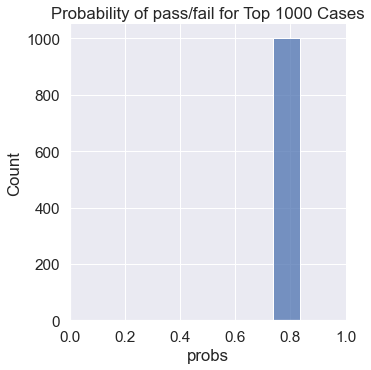

In [77]:
#plot distribution of pass/fail among first 1000 observations 
risky1000_df= probs_df.nlargest(1000,['probs']) 

sns.displot(risky1000_df, x="probs", bins=10)
plt.xlim([0,1])

plt.title("Probability of pass/fail for Top 1000 Cases")
plt.show()

NE: There is no range of probabilities likely because our best model is a decision tree. 

In [75]:
#Simulate random audits on the full chicago_2011_to_2013.csv dataset by picking 1000 observations at random

random1000_df = probs_df.sample(1000)
random1000_df


criticalCount  seriousCount  \
Inspection_ID DBA_Name                                                  
1099021       SONG DO                                 0             1   
1106567       Tapia's Pizzeria Inc                    0             0   
1285691       JESUS & PETRA ARANDA, INC               1             2   
1214668       Edgebrook                               0             0   
1296426       Eastside Soccer Dome, Inc.              0             2   
...                                                 ...           ...   
1345498       ABN AMRO SVCS - MAIN BANK               0             1   
1235169       LAS ESPERANZAS                          0             0   
1227403       FAST FOOD EL MEXICANO                   0             0   
1198811       FORZA                                   2             3   
1106769       TUTTO FRESCO                            0             0   

                                          minorCount  pastFail  pastCritical  \
Inspection_ID DBA_Name                                                         
1099021       SONG DO                              4         0             1   
1106567       Tapia's Pizzeria Inc                 5         0             0   
1285691       JESUS & PETRA ARANDA, INC            7         0             0   
1214668       Edgebrook                            2         0             0   
1296426       Eastside Soccer Dome, Inc.           3         0             0   
...                                              ...       ...           ...   
1345498       ABN AMRO SVCS - MAIN BANK            3         0             0   
1235169       LAS ESPERANZAS                       6         0             0   
1227403       FAST FOOD EL MEXICANO                4         0             0   
1198811       FORZA                                7         0             0   
1106769       TUTTO FRESCO                         9         0             0   

                                          pastSerious  pastMinor  \
Inspection_ID DBA_Name                                             
1099021       SONG DO                               0          8   
1106567       Tapia's Pizzeria Inc                  0          3   
1285691       JESUS & PETRA ARANDA, INC             0          4   
1214668       Edgebrook                             0          4   
1296426       Eastside Soccer Dome, Inc.            0          0   
...                                               ...        ...   
1345498       ABN AMRO SVCS - MAIN BANK             0          5   
1235169       LAS ESPERANZAS                        0          2   
1227403       FAST FOOD EL MEXICANO                 0          0   
1198811       FORZA                                 0          0   
1106769       TUTTO FRESCO                          0          0   

                                          timeSinceLast  firstRecord  \
Inspection_ID DBA_Name                                                 
1099021       SONG DO                          1.098630            0   
1106567       Tapia's Pizzeria Inc             1.200000            0   
1285691       JESUS & PETRA ARANDA, INC        0.841096            0   
1214668       Edgebrook                        0.498630            0   
1296426       Eastside Soccer Dome, Inc.       2.000000            1   
...                                                 ...          ...   
1345498       ABN AMRO SVCS - MAIN BANK        0.849315            0   
1235169       LAS ESPERANZAS                   0.821918            0   
1227403       FAST FOOD EL MEXICANO            2.000000            1   
1198811       FORZA                            2.000000            1   
1106769       TUTTO FRESCO                     2.000000            1   

                                          POLICE_DISTRICT  ageAtInspection  \
Inspection_ID DBA_Name                                                       
1099021       SONG DO                                20.0        10.82465

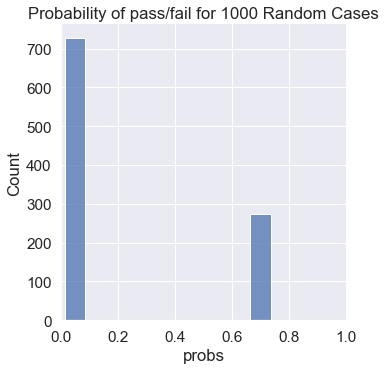

In [76]:
#plot distribution of 1000 random observations
sns.displot(random1000_df, x="probs", bins=10)
plt.xlim([0,1])

plt.title("Probability of pass/fail for 1000 Random Cases")
plt.show()

### 4.3 Predict on Data with Unseen Labels

In [80]:
chicago_inspections_2014.head()

Inspection_ID Inspection_Date                    DBA_Name  \
0         920444      2014-01-15  GALLISTEL LANGUAGE ACADEMY   
1         920445      2014-02-03                      SUBWAY   
2         920446      2014-02-03       SHARKS FISH & CHICKEN   
3         920448      2014-03-07              P K PETRO INC.   
4         920449      2014-03-07     Z T DOLLAR EXCHANGE,INC   

                     AKA_Name  License  Facility_Type             Risk  \
0  GALLISTEL LANGUAGE ACADEMY  2046708         School    Risk 1 (High)   
1                      SUBWAY  2183563     Restaurant    Risk 1 (High)   
2       SHARKS FISH & CHICKEN  1477112     Restaurant  Risk 2 (Medium)   
3                    MARATHON  1331469  Grocery Store     Risk 3 (Low)   
4                DOLLAR STORE  2189299  Grocery Store     Risk 3 (Low)   

                    Address     City State      Zip Inspection_Type  \
0         10200 S AVENUE J   CHICAGO    IL  60617.0         Canvass   
1          4025 E 106TH ST   CHICAGO    IL  60617.0         Canvass   
2           2027 E 95TH ST   CHICAGO    IL  60617.0         Canvass   
3  7001 S STONY ISLAND AVE   CHICAGO    IL  60649.0         Canvass   
4           2429 E 72ND ST   CHICAGO    IL  60649.0         Canvass   

    Latitude  Longitude                                 Location  \
0  41.709957 -87.534223   (41.70995714781606, -87.5342225149751)   
1  41.702577 -87.525872  (41.70257660937248, -87.52587169711877)   
2  41.722372 -87.574275  (41.72237211196818, -87.57427469548966)   
3  41.767798 -87.585820  (41.76779762303839, -87.58581991823232)   
4  41.764339 -87.565371  (41.764339216775696, -87.5653706801239)   

  Facility_Type_Clean  criticalCount  seriousCount  minorCount  pass_flag  \
0               Other              0             1           5          0   
1          Restaurant              2             0           0          0   
2          Restaurant              0             0           6          1   
3               Other              0             1           7          0   
4               Other              1             2           5          0   

   fail_flag  pastFail  pastCritical  pastSerious  pastMinor  timeSinceLast  \
0          1         0             0            0          2       0.964384   
1          0         0             0            0          0       0.794521   
2          0         0             0            0          2       0.660274   
3          1         0             0            0          0       2.000000   
4          1         0             0            0          0       2.000000   

   firstRecord                ID  LICENSE_ID  ACCOUNT_NUMBER  \
0            0               NaN         NaN             NaN   
1            0  2183563-20120829   2183563.0        375027.0   
2            0  1477112-20120716   2155150.0        273266.0   
3            1  1331469-20121216   2194284.0        257899.0   
4            1  2189299-20121009   2189299.0        249904.0   

                 LEGAL_NAME     DOING_BUSINESS_AS_NAME  \
0                       NaN                        NaN   
1              AMI SUB INC.                     SUBWAY   
2        A & K SHARKS, INC.      SHARKS FISH & CHICKEN   
3            P K PETRO INC.                Stony Shell   
4  ZT DOLLAR EXCHANGE, INC.  Z T DOLLAR EXCHANGE, INC.   

                   ADDRESS     CITY STATE  ZIP_CODE  WARD  PRECINCT  \
0                      NaN      NaN   NaN       NaN   NaN       NaN   
1        4025 E 106TH ST 1  CHICAGO    IL   60617.0  10.0      38.0   
2           2027 E 95TH ST  CHICAGO    IL   60617.0   7.0      49.0   
3  7001 S STONY ISLAND AVE  CHICAGO    IL   60649.0   5.0      21.0   
4           2429 E 72ND ST  CHICAGO    IL   60649.0   7.0      40.0   

  WARD_PRECINCT  POLICE_DISTRICT  LICENSE_CODE        LICENSE_DESCRIPTION  \
0           NaN              NaN           NaN                        NaN   
1         10-38              4.0        1006.0  Retail Food Establishment   
2      

In [81]:
chicago_inspections_2014.shape

(4623, 74)

In [82]:
chicago_inspections_2014.columns

Index(['Inspection_ID', 'Inspection_Date', 'DBA_Name', 'AKA_Name', 'License',
       'Facility_Type', 'Risk', 'Address', 'City', 'State', 'Zip',
       'Inspection_Type', 'Latitude', 'Longitude', 'Location',
       'Facility_Type_Clean', 'criticalCount', 'seriousCount', 'minorCount',
       'pass_flag', 'fail_flag', 'pastFail', 'pastCritical', 'pastSerious',
       'pastMinor', 'timeSinceLast', 'firstRecord', 'ID', 'LICENSE_ID',
       'ACCOUNT_NUMBER', 'LEGAL_NAME', 'DOING_BUSINESS_AS_NAME', 'ADDRESS',
       'CITY', 'STATE', 'ZIP_CODE', 'WARD', 'PRECINCT', 'WARD_PRECINCT',
       'POLICE_DISTRICT', 'LICENSE_CODE', 'LICENSE_DESCRIPTION',
       'BUSINESS_ACTIVITY_ID', 'BUSINESS_ACTIVITY', 'LICENSE_NUMBER',
       'APPLICATION_TYPE', 'LICENSE_TERM_START_DATE',
       'LICENSE_TERM_EXPIRATION_DATE', 'LICENSE_STATUS', 'LATITUDE',
       'LONGITUDE', 'minDate', 'maxDate', 'ageAtInspection',
       'consumption_on_premises_incidental_activity', 'tobacco',
       'package_goods', 'outdoor_p

In [84]:
# Drop column names related to geography, identification, and pass/fail flags that perfectly predict the outcome
chicago_inspections_2014.drop(columns = ['AKA_Name', 
                                                'License',
                                                'Address',
                                                'City',
                                                'State',
                                                'Zip',
                                                'Latitude',
                                                'Longitude',
                                                'Location',
                                                'ID',
                                                'LICENSE_ID',
                                                'LICENSE_TERM_START_DATE',
                                                'LICENSE_TERM_EXPIRATION_DATE',
                                                'LICENSE_STATUS',
                                                'ACCOUNT_NUMBER',
                                                'LEGAL_NAME',
                                                'DOING_BUSINESS_AS_NAME',
                                                'ADDRESS',
                                                'CITY',
                                                'STATE',
                                                'ZIP_CODE',
                                                'WARD',
                                                'PRECINCT',
                                                'LICENSE_CODE',
                                                'BUSINESS_ACTIVITY_ID',
                                                'BUSINESS_ACTIVITY',
                                                'LICENSE_NUMBER',
                                                'LATITUDE',
                                                'LONGITUDE',
                                                'pass_flag',
                                                'fail_flag'],
                                     inplace = True)

chicago_inspections_2014.set_index(['Inspection_ID', 'DBA_Name'], inplace = True)

In [85]:
# Convert the Inspection Date to a datetime format
chicago_inspections_2014['Inspection_Date'] = pd.to_datetime(chicago_inspections_2014['Inspection_Date'], infer_datetime_format=True)  

In [86]:
chicago_inspections_2014.shape

(4623, 41)

In [ ]:
# Fill in the code below with the X data you used for training
X_test = chicago_inspections_2014[chicago_inspections_2014.columns & probs_df.columns]

In [ ]:
#Predict outcomes and probabilities of the test set (2014 data)

In [ ]:
#Make a results column 

#Choose a metric from policy perspective and explain your choice

#Save predictions on in a file called predictions.csv

In [ ]:
# OTHER Fill in the code below with the X data you used for training our favorite model and metric of choice
X_test = chicago_inspections_2014[chicago_inspections_2014.columns & X2_train.columns]
##code to save predictions into csv file
np.savetxt('predictions.csv', [p for p in zip(y2)], delimiter=',', fmt='%s')

## 5. Discussion Questions

### 5.1 *Why do we need metrics beyond accuracy when using machine learning in the social sciences and public policy?*

Accuracy values indicate, in a general sense, the ration of correct predictions to incorrect ones. However, this form of assessing our performance can be deceptive. That is, it doesn't tell us much about the predictive performance at a granular level, considering all categories. For instance, imagine we collect information regarding hobbies, work schedules, books read, and other leisure activities from 100 mathematicians and 100 contemporary artists. If we mis-predict the careers of 10 mathematicians and 10 artists, our accuracy level is 90%, a value that is representative of both categories. On the other hand, if we're trying to predict the professions of 20 mathematicians and 180 contemporary artists using the same features, but only predict 2 mathematicians correctly while predicting 178 contemporary artists correctly, we still have an overall accuracy of 90%. But if we look closer at each category, we'd see that we're predicting artists' profession correctly 99% of the time while predicting mathematicians' career correctly only 10% of the time. Such an unbalanced distribution of the data in the two groups can lead to general accuracy levels that are deceptive for each category.

For that reason, we can use other methods for assessing our performance, including "precision" and "recall". In short, precision (measured by dividing the number of correct predictions of the positive category by the total number of predictions of the positive category) tells us how well the algorithm performed with the observations predicted to be positive. And recall (measured by dividing the number of correct predictions of the positive category by the sum of the correct predictions of the positive category and the incorrect predictions of the negative category) tells us how well the algorithm performed when predicting the label for all observations that in reality belong to the positive category.

However, there is a trade-off between recall and precision. If we move the prediction needle to improve one of the assessment metrics, this will negatively affect the other metric. For that reason, we can use other forms of assessing accuracy such as the F1-score. This metric is calculated as follows:

F1 = 2 * (precision*recall) / (precision+recall)

F1 scores help us optimize the trade-off between precision and recall because the numerator automatically penalizes either a low precision or recall value. That is, it provides equal weight to both metrics. Nonetheless, it is possible that for different projects we might want/need to prioritize one of the metrics, making F1 scores not appropriate for such cases.

### 5.2 *Imagine that establishments learned about the algorithm being used to determine who gets audited and they started adjusting their behavior (and changing certain key features about themselves that were important for the prediction) to avoid detection. How could policymakers address this interplay between algorithmic decisionmaking and real world behavior?* 